In [7]:
import numpy as np
import nibabel as nib
from PIL import Image
import os
from matplotlib import pyplot as plt

In [19]:
def generate_slice(image_path,orientation,slice_index):

    img_nifti = nib.load(image_path)

    img = np.array(img_nifti.dataobj)
    
    if orientation == 'sagittal' or orientation == 'sagital':
        return generate_slice_sagittal(slice_index, img)
    
    elif orientation == 'coronal':
        return generate_slice_coronal(slice_index, img)

    elif orientation == 'axial':
        return generate_slice_axial(slice_index, img)
    else:
        print("Invalid")

def generate_slice_sagittal(slice_index, img):

    rot = np.rot90(img, k=3, axes=(1,2)).copy()
    rot = np.rot90(rot, k=2, axes=(0,2)).copy()
    return  rot[slice_index,:,:]
            

def generate_slice_coronal(slice_index, img):

    rot = np.rot90(img, k=3, axes=(0,2)).copy()
    return  rot[:,slice_index,:]

def generate_slice_axial(slice_index, img):

    rot = np.rot90(img, k=3, axes=(0,1)).copy()        
    return  rot[:,:,slice_index]



In [22]:
ad_path = '/Users/olath/Documents/GitHub/Master-thesis/Data_Preprocessing/test_data/'

slices = list()
for subdir, dirs, files in os.walk(ad_path):
    for file in files:
        if '_' not in file:
            slice = generate_slice(ad_path + file, 'coronal', 43)
            slices.append(slice)


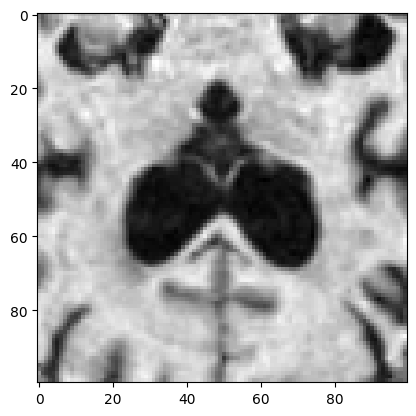

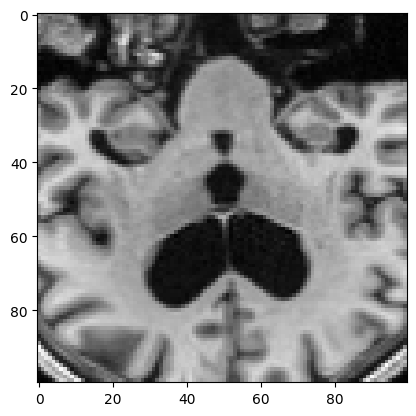

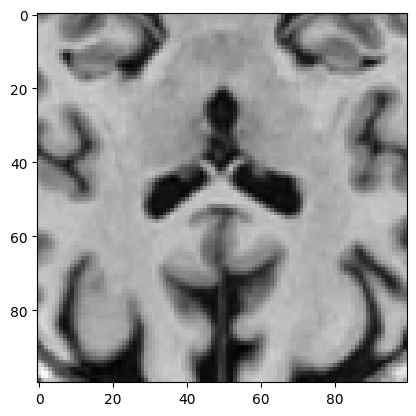

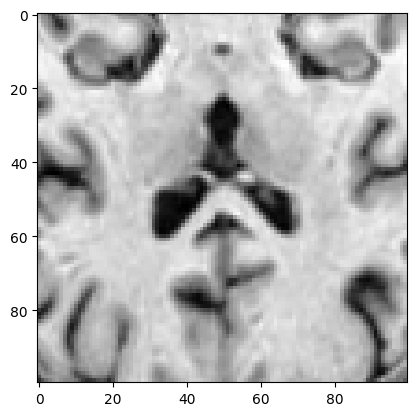

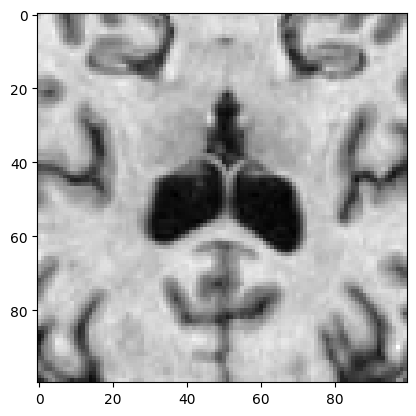

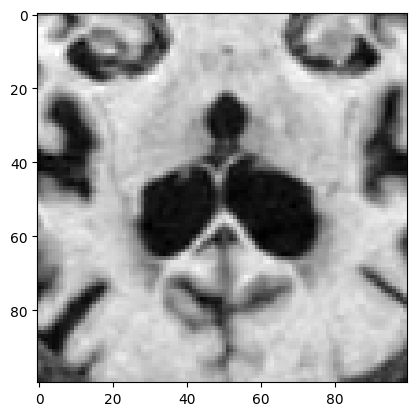

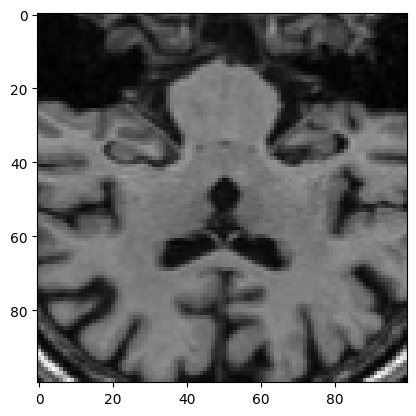

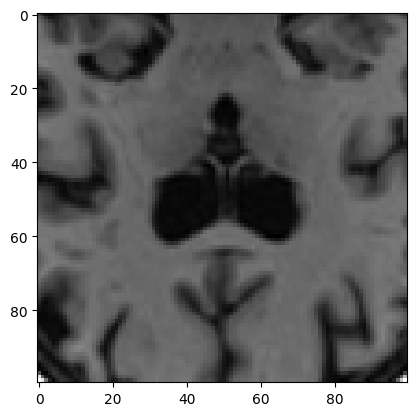

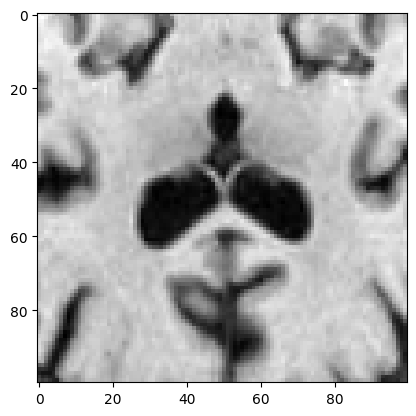

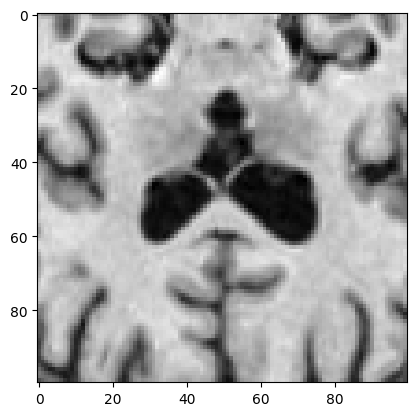

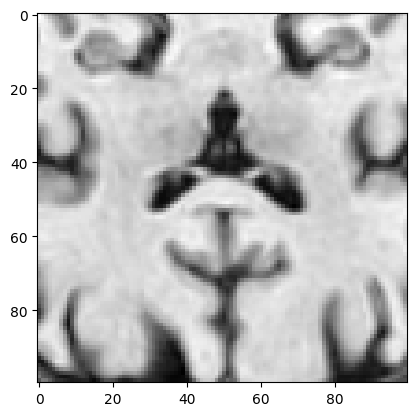

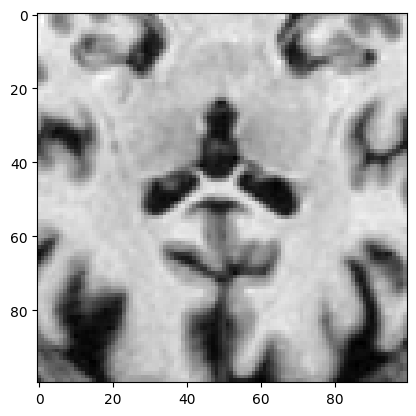

In [23]:
for slice in slices:
    plt.imshow(slice, cmap='gray')
    plt.show()